# Ensemble Methods, Decision Tree, Random Forest
## 1. Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Download dataset and do some preprocessing

In [2]:
# From UCI https://archive.ics.uci.edu/ml/datasets/auto+mpg
download_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
data = pd.read_csv(download_path, names=column_names, 
                   na_values = "?", comment='\t', 
                   sep=" ", skipinitialspace=True)

# tranform the ID for Origin to a categorical variable, then make dummy variables
data['Origin'] = ['US' if i==1  else 'Europe' if i==2 else 'Japan' for i in data['Origin']]
data = pd.get_dummies(data)

# drop observations from missing data
data = data.dropna()

In [3]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_US
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


## 3. Split into training and testing
Keep as pandas data frame for now, and keep X and y together.

In [4]:
data_train, data_test = train_test_split(data, test_size=.3, random_state=1)


## 4. Explore the data

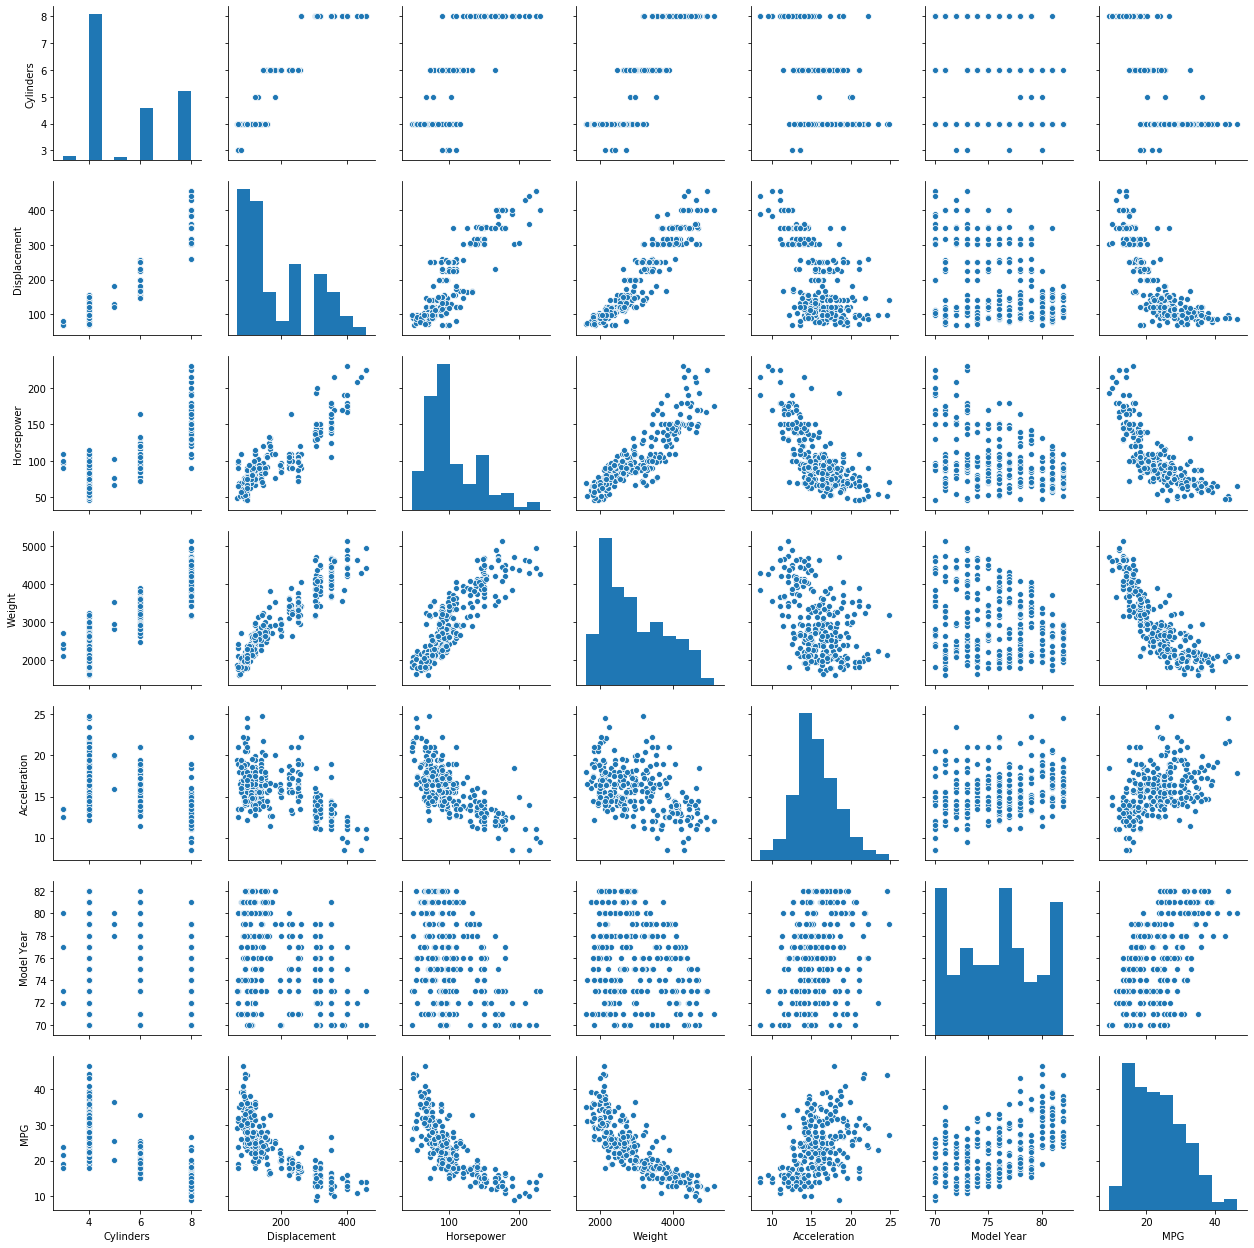

In [5]:
columns_to_plot = ['Cylinders', 'Displacement', 'Horsepower', 
                   'Weight', 'Acceleration', 'Model Year', 'MPG']

sns.pairplot(pd.DataFrame(data_train[columns_to_plot])) 

## 5. Split into X and y to predict MPG
Since we already split into training and testing, we just need to pull these out of X and y.

In [10]:
y_train = data_train['MPG']
X_train = data_train.drop('MPG', axis=1)
y_test = data_test['MPG']
X_test = data_test.drop('MPG', axis=1)

## 6. Standardize

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 7. Fit a Random Forest model with 10 trees, max tree depth = .3 and max features = sqrt(p)

In [12]:
rf = RandomForestRegressor(n_estimators=10, max_features='sqrt', max_depth=3)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## 8. Calculate metrics

In [13]:
rf_preds = rf.predict(X_test)
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, rf_preds))))
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, rf_preds)))

RMSE: 3.57
MAE: 2.44


## 9. Plot variable importance

<BarContainer object of 9 artists>

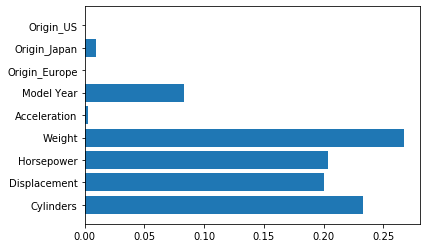

In [14]:
feature_names = data_train.columns[1:]
plt.barh(feature_names, rf.feature_importances_)

# Part 2

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split

In [17]:
lg=LinearRegression()

In [19]:
lg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
reg_preds= lg.predict(X_train)

In [24]:
lg.coef_

array([-0.39598954,  2.52110902, -0.05628764, -6.43076554,  0.77311251,
        2.85729906,  0.42544546,  0.48318776, -0.73866373])

<BarContainer object of 9 artists>

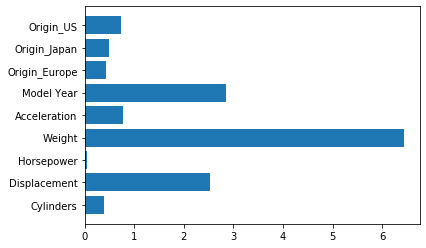

In [26]:
feature_names = data_train.columns[1:]
plt.barh(feature_names, np.abs(lg.coef_))

<BarContainer object of 9 artists>

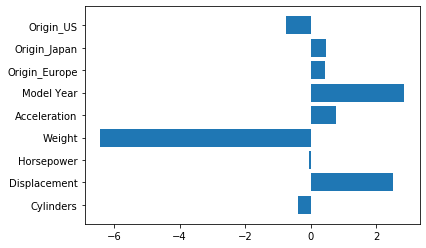

In [27]:
plt.barh(feature_names, lg.coef_)

In [38]:
clf = GridSearchCV(rf, 
                   param_grid={'n_estimators':list(range(100, 1000, 100)), 'max_depth': list(range(1,5))},
                   scoring = 'neg_mean_squared_error')
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=3,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [39]:
clf.best_params_
#max_depth normally no more than 10

{'max_depth': 4, 'n_estimators': 400}

In [40]:
rf = RandomForestRegressor(n_estimators=400, max_features='sqrt', max_depth=4)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, rf_preds))))
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, rf_preds)))

RMSE: 3.44
MAE: 2.38


<BarContainer object of 9 artists>

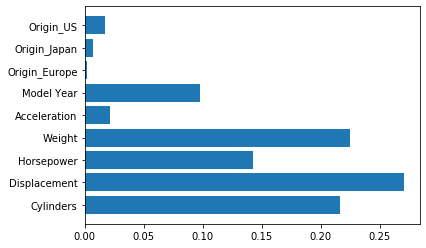

In [42]:
feature_names = data_train.columns[1:]
plt.barh(feature_names, rf.feature_importances_)

In [43]:
rf_oob=RandomForestRegressor
n_est=list(range(100, 201, 100))

In [46]:
max_depth = list(range(1,5))
oob= []

for i in n_est:
    for j in max_depth:
        rf=RandomForestRegressor(n_estimators=1, max_depth=j, oob_score=True)
        rf.fit(X_train, y_train)
        oob.append(rf.oob_score_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not hav

In [47]:
oob

[-5.2121709770506035,
 -5.7593835367030195,
 -5.252330903232334,
 -5.467723677800295,
 -5.486456469182376,
 -5.897216274855006,
 -5.842496289910606,
 -5.842654246183688]